**Library Imports**

In [1]:
import pandas as pd
import io
import requests
import numpy as np
import os
import seaborn as sns

from scipy.stats import zscore

from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

from matplotlib import pyplot
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model

from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from sklearn.preprocessing import LabelEncoder
from IPython.display import display

from imblearn.over_sampling import SMOTE

import tensorflow as tf

Panda Preferences

In [2]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

Read CSV

In [3]:
df_train = pd.read_csv("../../../../../Datasets/Flows/train.csv")
display(df_train)

,service,traffic,total_bytes,total_pkts,pkt_difference,byte_difference,total_data_pkts,payload_ratio,total_payload_volume,fwd_bwd_pkts_diff,duration_weighted_pkts,pkts_size_weighted,flow_pkts_size_weighted,header_size_ratio,total_header_size,header_size_diff,fwd_bwd_payload_tot_diff,fwd_bwd_payload_avg_diff,flow_fwd_payload_diff,flow_bwd_payload_diff,flow_payload_range,total_activity,history_originator,history_responder,proto_1,proto_2,proto_3,pkts_unidirectional_traffic_0,pkts_unidirectional_traffic_1,iat_is_unidirectional_False,iat_is_unidirectional_True,is_attack
0,0,rudeadyet,-0.004437,3,-0.083659,-0.003766,0,-0.558121,-0.420430,-0.068478,0.272657,-0.033846,-0.033855,-0.282959,0.275477,0.072084,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427032,1,1,1,0,0,0,1,1,0,1
1,2,normal,-0.004434,10,0.034060,-0.003763,5,0.972797,0.954078,0.000492,1.991445,-0.033842,-0.033850,-0.277062,2.252854,-0.304226,0.502434,0.177140,-0.233301,0.107235,0.063188,2.420676,1,1,1,0,0,0,1,1,0,0
2,0,normal,-0.004383,6,0.465697,-0.003696,6,2.503716,1.228979,0.000492,1.009351,0.020996,0.020961,-0.277459,-0.148246,-0.304226,-0.260035,-0.241610,1.491583,1.067853,-0.042359,-0.426966,1,2,0,1,0,0,1,1,0,0
3,0,netscan,-0.004437,2,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,0.025583,-0.033846,-0.033855,-0.275309,-0.183556,-0.257187,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,1,1,1,0,0,1,0,0,1,1
4,0,normal,-0.004437,6,-0.122899,-0.003766,6,2.503716,1.228979,0.000492,1.009273,0.020662,0.020627,-0.277459,-0.148246,-0.304226,-0.260035,-0.241610,1.491583,1.067853,-0.042359,-0.426964,1,1,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439302,2,normal,-0.004434,10,0.073300,-0.003762,5,0.972797,0.954078,0.000492,1.991444,-0.033842,-0.033850,-0.277062,2.252854,-0.304226,0.502434,0.177140,-0.233301,0.107235,0.063188,2.394997,1,1,1,0,0,0,1,1,0,0
439303,0,normal,-0.004437,10,-0.122899,-0.003766,5,0.972797,0.954078,0.000492,-0.463950,-0.033846,-0.033855,3.474099,2.252854,3.458871,0.502434,-0.002324,-0.233301,0.107235,0.063188,2.395117,1,1,1,0,0,0,1,0,1,0
439304,2,normal,-0.004434,10,0.073300,-0.003762,5,0.972797,0.954078,0.000492,1.991444,-0.033842,-0.033850,-0.277062,2.252854,-0.304226,0.502434,0.177140,-0.233301,0.107235,0.063188,2.420131,1,1,1,0,0,0,1,1,0,0
439305,0,camoverflow,-0.004437,1,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,-0.463950,-0.033846,-0.033855,-0.288748,-0.571970,-0.304226,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,0,0,1,0,0,0,1,0,1,1


In [4]:
df_test = pd.read_csv("../../../../../Datasets/Flows/test.csv")
display(df_test)

,service,traffic,total_bytes,total_pkts,pkt_difference,byte_difference,total_data_pkts,payload_ratio,total_payload_volume,fwd_bwd_pkts_diff,duration_weighted_pkts,pkts_size_weighted,flow_pkts_size_weighted,header_size_ratio,total_header_size,header_size_diff,fwd_bwd_payload_tot_diff,fwd_bwd_payload_avg_diff,flow_fwd_payload_diff,flow_bwd_payload_diff,flow_payload_range,total_activity,history_originator,history_responder,proto_1,proto_2,proto_3,pkts_unidirectional_traffic_0,pkts_unidirectional_traffic_1,iat_is_unidirectional_False,iat_is_unidirectional_True,is_attack
0,0,normal,-0.004383,6,0.465697,-0.003696,6,2.503716,1.228979,0.000492,1.009201,0.028962,0.028923,-0.277459,-0.148246,-0.304226,-0.260035,-0.241610,1.491583,1.067853,-0.042359,-0.426968,1,2,0,1,0,0,1,1,0,0
1,2,normal,-0.004434,6,0.073300,-0.003762,6,2.503716,1.228979,0.000492,1.009343,0.021669,0.021634,-0.277459,-0.148246,-0.304226,-0.260035,-0.241610,1.491583,1.067853,-0.042359,-0.426950,1,1,1,0,0,0,1,1,0,0
2,0,netscan,-0.004437,2,-0.122899,-0.003766,0,-0.558121,-0.420430,0.000492,0.026684,-0.033846,-0.033855,-0.275309,-0.183556,-0.257187,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,1,1,1,0,0,1,0,0,1,1
3,2,normal,-0.004434,8,0.073300,-0.003762,4,0.972797,0.679176,0.000492,1.500366,-0.033842,-0.033850,-0.277080,1.687889,-0.304226,0.363804,0.177140,-0.233301,0.024896,0.063188,1.188589,1,1,1,0,0,0,1,1,0,0
4,0,normal,-0.004383,10,0.465697,-0.003696,5,0.972797,0.954078,0.000492,-0.463950,-0.033846,-0.033855,3.474099,2.252854,3.458871,0.502434,-0.002324,-0.233301,0.107235,0.063188,2.392148,1,2,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146431,0,rudeadyet,-0.004437,3,-0.083659,-0.003766,0,-0.558121,-0.420430,-0.018061,0.272664,-0.033846,-0.033855,-0.282959,0.275477,0.072084,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.426917,1,1,1,0,0,0,1,1,0,1
146432,0,slowloris,-0.004437,3,-0.083659,-0.003766,0,-0.558121,-0.420430,-0.526904,0.272717,-0.033846,-0.033855,-0.282959,0.275477,0.072084,-0.190720,-0.181788,-0.233301,-0.304458,-0.147905,-0.427041,1,1,1,0,0,0,1,1,0,1
146433,0,normal,-0.004437,13,-0.122899,-0.003766,7,1.090560,1.503881,0.000492,-0.463950,-0.033846,-0.033855,4.602953,3.100301,4.587800,0.594855,-0.025332,-0.233301,0.162128,0.063188,2.391199,1,1,1,0,0,0,1,0,1,0
146434,0,normal,-0.004437,10,-0.122899,-0.003766,5,0.972797,0.954078,0.000492,1.991443,-0.033842,-0.033850,-0.277062,2.252854,-0.304226,0.502434,0.177140,-0.233301,0.107235,0.063188,2.398506,1,1,1,0,0,0,1,1,0,0


In [5]:
df_train.groupby('traffic')['traffic'].count()

traffic
apachekiller      1756
arpspoofing       8361
camoverflow      46934
mqttmalaria       3709
netscan          46767
normal          225000
rudeadyet        54088
slowloris        47685
slowread          5007
Name: traffic, dtype: int64

In [6]:
df_test.groupby('traffic')['traffic'].count()

traffic
apachekiller      578
arpspoofing      2861
camoverflow     15566
mqttmalaria      1252
netscan         15733
normal          75000
rudeadyet       17902
slowloris       15811
slowread         1733
Name: traffic, dtype: int64

---------------------------------------

**Create Model & Train Model**

In [7]:
df_train = df_train.drop('is_attack', axis=1)
df_test = df_test.drop('is_attack', axis=1)

In [8]:
x_columns = df_train.columns.drop('traffic')

le = LabelEncoder()
le.fit(df_train["traffic"].values)

x = df_train[x_columns].values
y = df_train["traffic"].values
y = le.transform(y)

In [9]:
x_columns_val = df_test.columns.drop('traffic')

le = LabelEncoder()
le.fit(df_test["traffic"].values)

x_val = df_test[x_columns].values
y_val = df_test["traffic"].values
y_val = le.transform(y_val)

In [10]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [11]:
x_test.shape,y_test.shape

((109827, 30), (109827,))

In [12]:
x_train.shape,y_train.shape

((329480, 30), (329480,))

In [13]:
x_val.shape, y_val.shape

((146436, 30), (146436,))

In [14]:
import numpy as np

# Random state definition
random_state=42
np.random.seed(random_state)

In [15]:
from sklearn import metrics

# Classification Metrics: Accuracy, Recall, Precision & F1Score
def compute_metrics(y_test, pred):
    print('Accuracy:', metrics.accuracy_score(y_test, pred))
    print('Recall:', metrics.recall_score(y_test, pred, average = 'weighted'))
    print('Precision:', metrics.precision_score(y_test, pred, average = 'weighted'))
    print('F1-Score:', metrics.f1_score(y_test, pred, average = 'weighted'))

In [16]:
# Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

def extra_tree_classifier(x_train, y_train, x_columns):
    # Usage of ExtraTreesClassifier for feature selection
    extra_tree_forest = ExtraTreesClassifier(n_estimators=5, criterion='entropy', max_features=2, random_state=random_state)
    extra_tree_forest.fit(x_train, y_train)
    feature_importances = extra_tree_forest.feature_importances_
    feature_importance_normalized = np.std([tree.feature_importances_ for tree in  extra_tree_forest.estimators_], axis = 0)

    # Plot the feature importances
    plt.rcParams["figure.figsize"] = (70, 40)
    plt.bar(x_columns, feature_importance_normalized, align='center')
    plt.xlabel('Feature Index')
    plt.ylabel('Feature Importance')
    plt.title('Comparison of different feature importances in the current dataset')
    plt.xticks(rotation=90)
    plt.show()

In [17]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

ATTACKS = [
    'Apache Killer', 'ARP Spoofing', 
    'CAM Overflow', 'MQTT Malaria', 
    'Netscan', 'Normal', 
    'RUDY', 'SlowLoris', 
    'SlowRead'
]
    
def conf_matrix(y_test, prediction, array_dimension = 2):
    if (array_dimension == 2):
        predict_classes = np.argmax(prediction, axis = 1)
        expected_classes = np.argmax(y_test, axis = 1)
    elif (array_dimension == 1):
        predict_classes = prediction
        expected_classes = y_test
    
    cm = confusion_matrix(expected_classes, predict_classes)
    cmd = ConfusionMatrixDisplay(cm, display_labels=ATTACKS)

    # Plot size
    fig, ax = plt.subplots(figsize=(11,11))
    
    cmd.plot(ax=ax, cmap=plt.cm.Blues, colorbar=False)
    
    # Add axis labels and rotate them
    ax.set_xlabel('Predicted labels', rotation=0, labelpad=20, fontsize=11)
    ax.set_ylabel('True labels', rotation=90, labelpad=20, fontsize=11)

    ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
    ax.set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8])
    ax.set_xticklabels(ATTACKS)
    ax.set_yticklabels(ATTACKS)
        
    ax.tick_params(axis='x', pad=35)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='center', va='center')
    ax.tick_params(axis='y', pad=35)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=40, ha='center', va='center')
    
    # Adjust colorbar size
    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=11)  # Adjust the font size of colorbar labels
    cax = fig.add_axes([ax.get_position().x1+0.03,ax.get_position().y0,0.02,ax.get_position().height])
    plt.colorbar(cmd.im_, cax=cax)

In [18]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=False):
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshowac(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

[METRICS] Decision Tree Classifier
Accuracy: 0.9250457537763938
Recall: 0.9250457537763938
Precision: 0.9297309309040851
F1-Score: 0.9261044569241197

[CMATRIX] Decision Tree Confusion Matrix
CPU times: user 409 ms, sys: 48.8 ms, total: 457 ms
Wall time: 456 ms


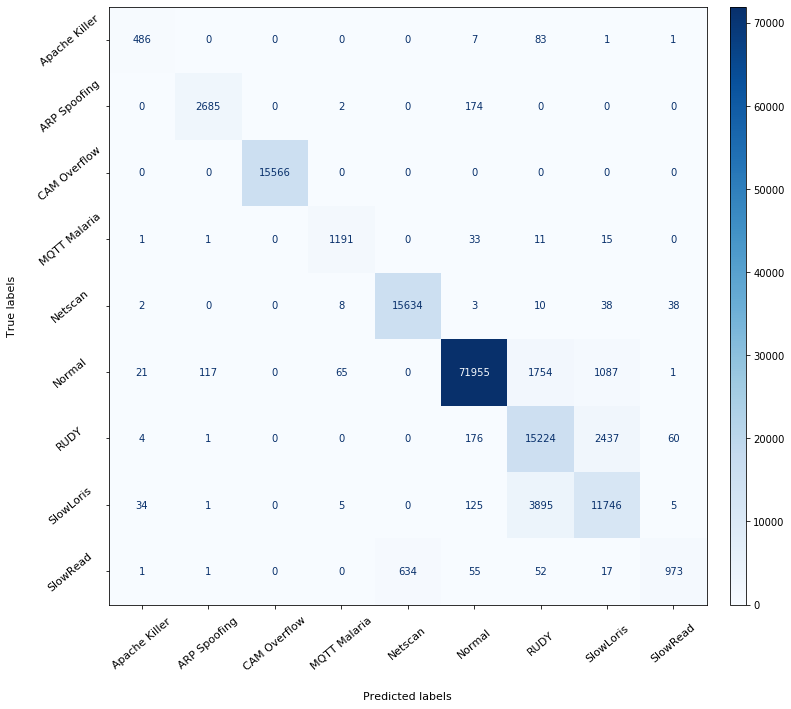

In [20]:
%%time

# Algorithm: Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_val)

print(f'[METRICS] Decision Tree Classifier')
compute_metrics(y_val, y_pred)

print(f'\n[CMATRIX] Decision Tree Confusion Matrix')
conf_matrix(y_val, y_pred, 1)